In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv(r'http://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data',header=None,delimiter=',',names=['buying','maint','doors','persons','lug_boot','safety','CAR'])

In [5]:
from sklearn.preprocessing import LabelEncoder
lbc=LabelEncoder()
df["buying"]=lbc.fit_transform(df["buying"])
df["maint"]=lbc.fit_transform(df["maint"])
df["lug_boot"]=lbc.fit_transform(df["lug_boot"])
df["safety"]=lbc.fit_transform(df["safety"])
df["doors"]=lbc.fit_transform(df["doors"])
df["persons"]=lbc.fit_transform(df["persons"])
df['CAR'].unique()

array(['unacc', 'acc', 'vgood', 'good'], dtype=object)

In [6]:
df.applymap(np.isreal).head()

,buying,maint,doors,persons,lug_boot,safety,CAR
0,True,True,True,True,True,True,False
1,True,True,True,True,True,True,False
2,True,True,True,True,True,True,False
3,True,True,True,True,True,True,False
4,True,True,True,True,True,True,False


In [7]:
X=df.drop(['CAR'],axis=1).values
y=df['CAR'].values

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from math import sqrt
from sklearn.metrics import mean_squared_error
y1=lbc.fit_transform(df["CAR"])
rmse=[]
for k in range(20):
  k=k+1
  knn=KNeighborsClassifier(n_neighbors=k)
  knn.fit(X,y1)
  rmse.append(sqrt(mean_squared_error(y1,knn.predict(X))))
  print('K value ',k,'rmse ',sqrt(mean_squared_error(y1,knn.predict(X))))

K value  1 rmse  0.0
K value  2 rmse  0.5017331074496789
K value  3 rmse  0.5464532103585
K value  4 rmse  0.5808478796201801
K value  5 rmse  0.4871021643541717
K value  6 rmse  0.4947642536265799
K value  7 rmse  0.40966336677090626
K value  8 rmse  0.34860834438919813
K value  9 rmse  0.23199018178458425
K value  10 rmse  0.2602082499332666
K value  11 rmse  0.2784713563300475
K value  12 rmse  0.4046889523425963
K value  13 rmse  0.44811849458060216
K value  14 rmse  0.5368374469468802
K value  15 rmse  0.5853140973807077
K value  16 rmse  0.6382847385042254
K value  17 rmse  0.6804138174397717
K value  18 rmse  0.6752914322857344
K value  19 rmse  0.7383352144445562
K value  20 rmse  0.7530800950958866


In [14]:
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)

In [16]:
from sklearn import metrics
print("Accuracy ",metrics.accuracy_score(y,knn.predict(X)))

Accuracy  0.9565972222222222


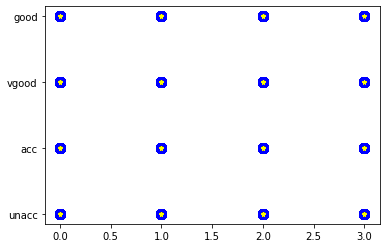

In [19]:
for xe, ye in zip(X,y):
  plt.scatter(xe,[ye]*
  len(xe),color="blue",marker="o",s=100)
for xe, ye in zip(X,knn.predict(X)):
  plt.scatter(xe,[ye]*
  len(xe),color="yellow",marker="*",s=10)
plt.show()